In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
print(crime.head())
crime

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
print(crime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [6]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [7]:
array=crime.values
array 

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

#### Normalize heterogenous numerical data using standard scalar fit transform to dataset

In [8]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X   

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# DBSCAN Clustering

In [9]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=4)

In [10]:
# Noisy samples are given the label  -1.

dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

##### Adding clusters to dataset

In [11]:
crime['clusters']=dbscan.labels_
crime

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [12]:
crime.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


### Plot Clusters

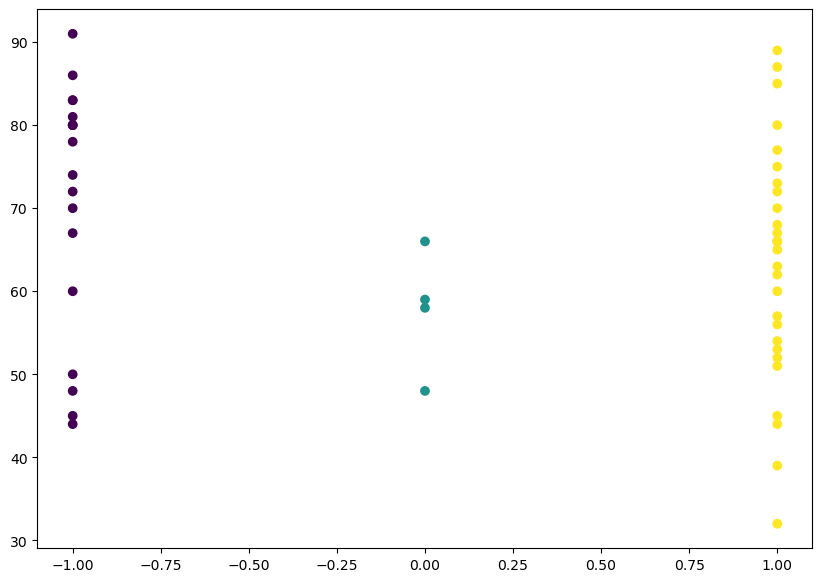

In [13]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clusters'],crime['UrbanPop'], c=dbscan.labels_) 

In [14]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])   

In [15]:
cl
pd.set_option("display.max_rows", None)  

In [16]:
cl

,cluster
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,-1


In [17]:
crime1 = pd.concat([crime,cl],axis=1)
crime1

,Murder,Assault,UrbanPop,Rape,clusters,cluster
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,-1,-1
2,8.1,294,80,31.0,-1,-1
3,8.8,190,50,19.5,-1,-1
4,9.0,276,91,40.6,-1,-1
5,7.9,204,78,38.7,-1,-1
6,3.3,110,77,11.1,1,1
7,5.9,238,72,15.8,-1,-1
8,15.4,335,80,31.9,-1,-1
9,17.4,211,60,25.8,-1,-1


In [18]:
plt.style.use('classic')

# 1.DBScan Clustering

Text(0.5, 1.0, 'Clusters using DBScan')

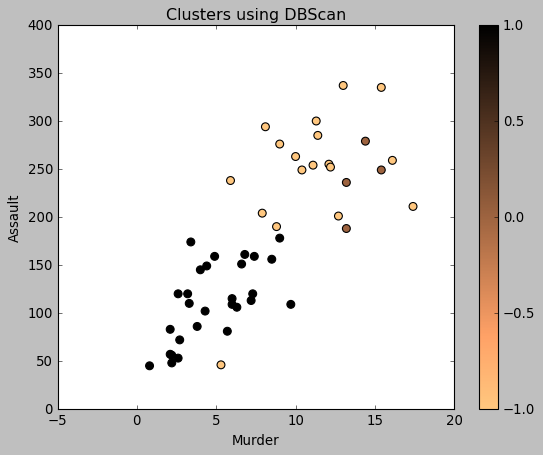

In [19]:
crime.plot(x= 'Murder',y='Assault',c=dbscan.labels_,kind= 'scatter',s=50,cmap=plt.cm.copper_r)
plt.title('Clusters using DBScan')

In [20]:
crime.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


In [21]:
dl = dbscan.labels_  

In [22]:
import sklearn
sklearn.metrics.silhouette_score(X, dl)   

0.2051154919322

In [23]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(X)  

In [24]:
y_kmeans

array([2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0,
       1, 0, 0, 1, 1, 0])

In [25]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1 

,Kcluster
0,2
1,2
2,2
3,1
4,2
5,2
6,0
7,0
8,2
9,2


In [26]:
crime2 = pd.concat([crime1,cl1],axis=1) 
crime2

,Murder,Assault,UrbanPop,Rape,clusters,cluster,Kcluster
0,13.2,236,58,21.2,0,0,2
1,10.0,263,48,44.5,-1,-1,2
2,8.1,294,80,31.0,-1,-1,2
3,8.8,190,50,19.5,-1,-1,1
4,9.0,276,91,40.6,-1,-1,2
5,7.9,204,78,38.7,-1,-1,2
6,3.3,110,77,11.1,1,1,0
7,5.9,238,72,15.8,-1,-1,0
8,15.4,335,80,31.9,-1,-1,2
9,17.4,211,60,25.8,-1,-1,2


# 2. KMeans Clustering

Text(0.5, 1.0, 'Clusters using KMeans')

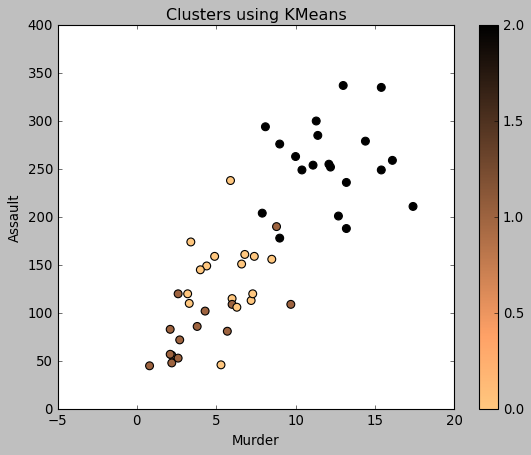

In [27]:
crime2.plot(x="Murder",y ="Assault",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans') 

In [28]:
sklearn.metrics.silhouette_score(X, y_kmeans)

0.30813622648945616

In [29]:
from sklearn.neighbors import NearestNeighbors

In [30]:
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)  

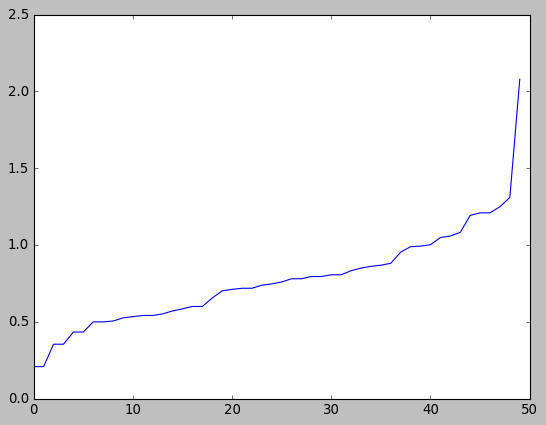

In [31]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances) 

# 3. Hierarchical Clustering

In [32]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

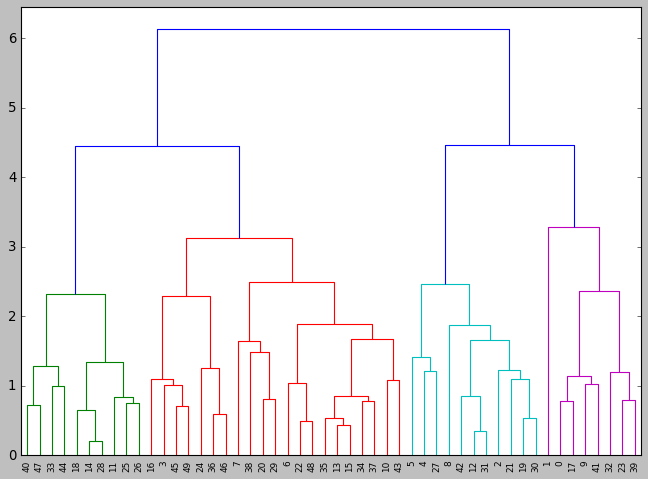

In [33]:
plt.figure(figsize=(10,7))
dendrogram=sch.dendrogram(sch.linkage(X,'complete'))

### Create clusters (y)

In [34]:
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [35]:
y=pd.DataFrame(hclusters.fit_predict(X),columns=['clustersid'])
y['clustersid'].value_counts()

1    15
0    12
2    12
3     7
4     4
Name: clustersid, dtype: int64

#### Adding clusters to dataset

In [36]:
crime3=crime.copy()
crime3['clustersid']=hclusters.labels_
crime3


,Murder,Assault,UrbanPop,Rape,clusters,clustersid
0,13.2,236,58,21.2,0,3
1,10.0,263,48,44.5,-1,0
2,8.1,294,80,31.0,-1,0
3,8.8,190,50,19.5,-1,4
4,9.0,276,91,40.6,-1,0
5,7.9,204,78,38.7,-1,0
6,3.3,110,77,11.1,1,1
7,5.9,238,72,15.8,-1,1
8,15.4,335,80,31.9,-1,0
9,17.4,211,60,25.8,-1,3


In [37]:
crime3.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape,clusters
,,mean,mean,mean,mean,mean
0,0,10.966667,264.000000,76.500000,33.608333,-1.000000
1,1,5.613333,138.866667,75.266667,19.493333,0.733333
2,2,3.091667,76.000000,52.083333,11.833333,1.000000
3,3,14.671429,251.285714,54.285714,21.685714,-0.428571
4,4,8.450000,154.000000,56.250000,18.025000,0.500000


### Plot Clusters

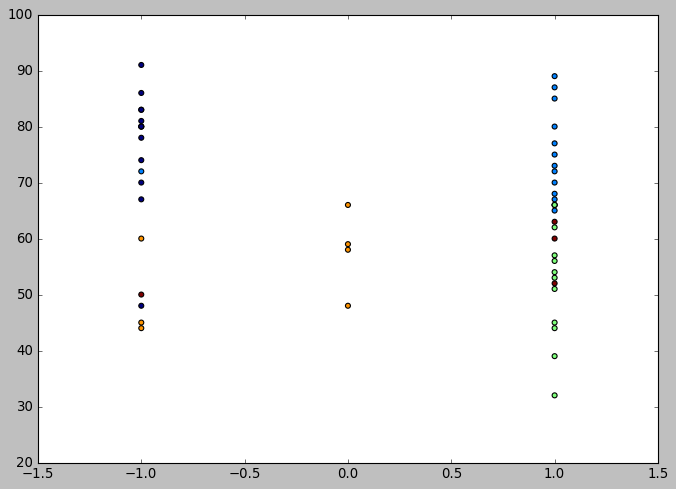

In [38]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clusters'],crime['UrbanPop'], c=hclusters.labels_) 